In [1]:
from altaipony.lcio import from_mast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)
%matplotlib inline

In [2]:
df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")

<>:1: DeprecationWarning: invalid escape sequence '\V'
<>:1: DeprecationWarning: invalid escape sequence '\V'
C:\Users\thoma\AppData\Local\Temp\ipykernel_34620\3456439302.py:1: DeprecationWarning: invalid escape sequence '\V'
  df = pd.read_csv("C:\Vs_code_projects\mdwarf_flares\epic_catalogue.csv")


In [3]:
df.loc[2816]

Unnamed: 0                         2816.000000
EPIC ID                       233141325.000000
Teff                               4144.682000
logg                                  4.253800
Flare #                              23.000000
Observation time                     70.918610
Average flare duration                0.158123
Longest flare duration                0.612949
Shortest flare duration               0.081727
Average percentage increase          34.881323
Highest percentage increase         202.261949
Lowest percentage increase            9.009087
Name: 2816, dtype: float64

In [4]:
flc = from_mast("233141325", mode="LC", mission="K2")

7% (79/1138) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
7% (79/1138) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
12% (278/2333) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).
12% (278/2333) of the cadences will be ignored due to the quality mask (quality_bitmask=1130799).


In [5]:
flc = flc[0]

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

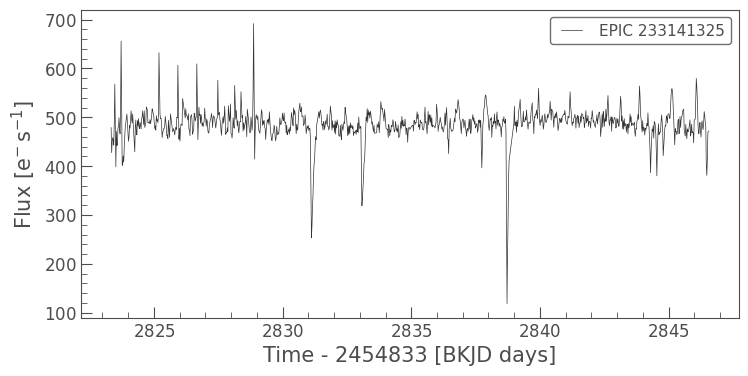

In [6]:
flc.plot()

In [7]:
flc = flc.detrend("savgol")

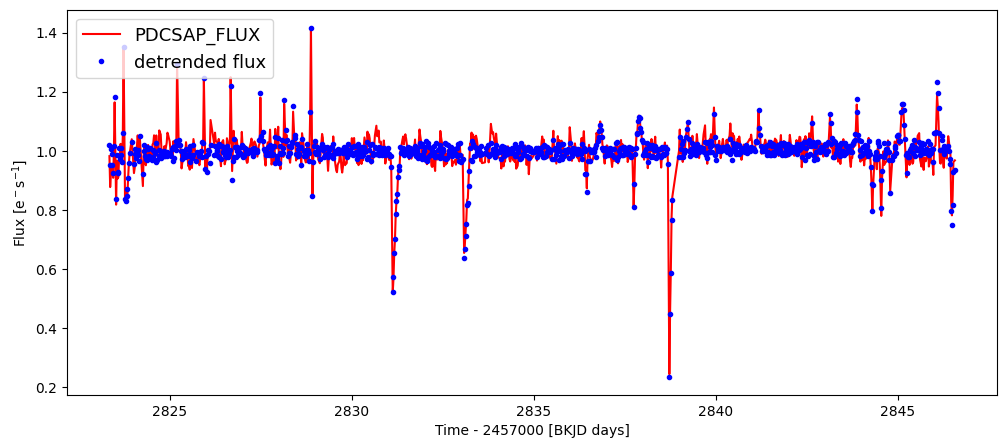

In [8]:
plt.figure(figsize=(12,5))
plt.plot(flc.time.value, flc.flux / np.nanmedian(flc.flux), "r", label="PDCSAP_FLUX")
plt.plot(flc.time.value, flc.detrended_flux / np.nanmedian(flc.detrended_flux), "b.", label="detrended flux")
plt.xlabel("Time - 2457000 [BKJD days]")
plt.ylabel(r"Flux [e$^-$s$^{-1}$]")
#plt.xlim(3458, 3460)
#plt.ylim(.95,1.05)
plt.legend(loc=2,fontsize=13);

In [10]:
test.flares

,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,dur,total_n_valid_data_points
0,598,603,133498,133503,2836.779806,2836.881965,578.2205529264666,44.57998691121782,0.09009087085723877,0.102159,1041.000000
1,646,653,133549,133556,2837.821830,2837.964853,1062.0234426531028,52.45758480931725,0.11690402030944824,0.143023,1041.000000
2,972,977,133905,133910,2845.095543,2845.197702,1136.0932313073004,44.48446285590631,0.1524944305419922,0.102159,1041.000000
3,1014,1021,133949,133957,2845.994540,2846.157993,1475.1730647401484,48.946966431991804,0.22736907005310059,0.163454,1041.000000


In [9]:
test = flc.find_flares(N1 = 3, N2 = 3, N3 = 4)

Found 0 candidate(s) in the (0,118) gap.
Found 2 candidate(s) in the (118,693) gap.
Found 2 candidate(s) in the (693,1041) gap.
C:\Users\thoma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\altaipony\altai.py:210: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  lc.flares = pd.concat([lc.flares, new], ignore_index=True)
